# Phishing Website Detection
1. Objective:
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models on the dataset created to predict phishing websites.The performance level of each model is measures and compared.

 

# 1) Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('dataset_website.csv')
data

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,6,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
6,7,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,8,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,9,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
9,10,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1


# 2) Familiarizing with Data

In [3]:
data.shape

(11055, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
index                          11055 non-null int64
having_IPhaving_IP_Address     11055 non-null int64
URLURL_Length                  11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

In [5]:
 data.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [6]:
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data = data.drop(['index'], axis = 1)


# 3) Visualizing the data
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.



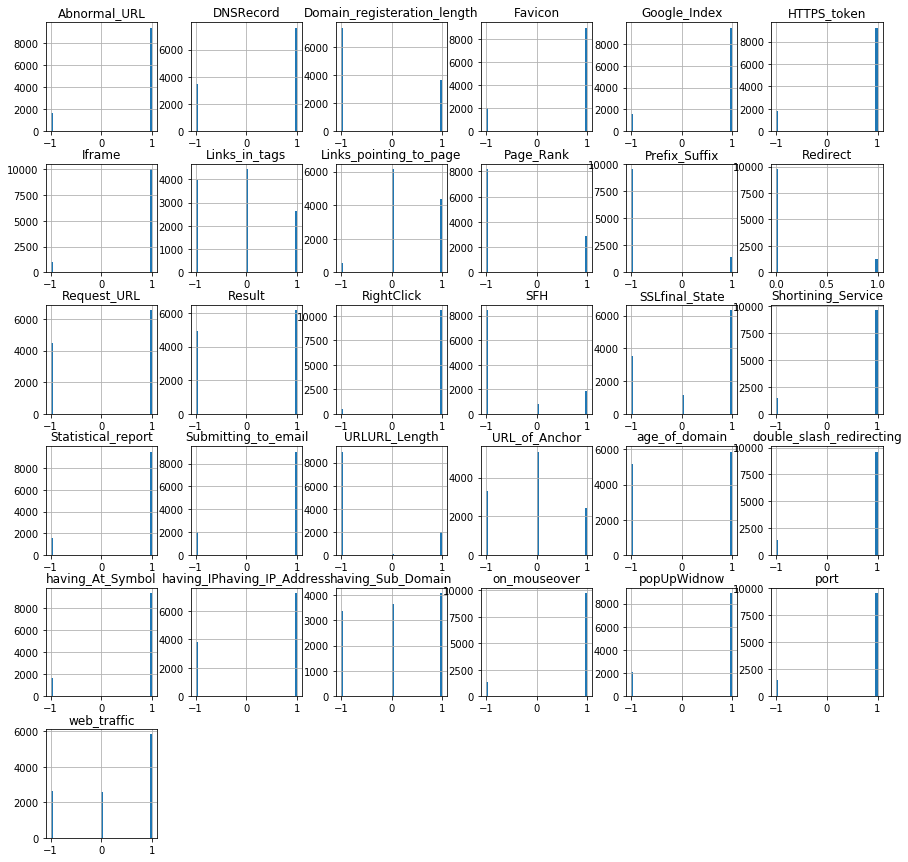

In [8]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

In [9]:
import seaborn as sns

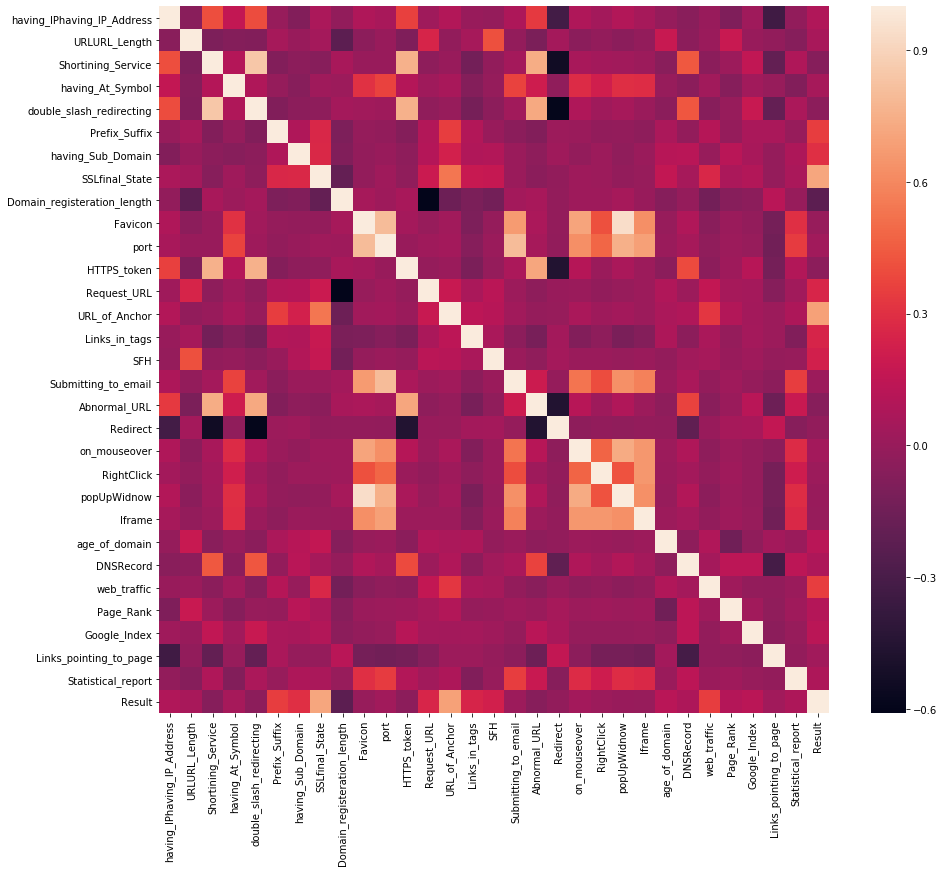

In [10]:
#correlation heat map

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()


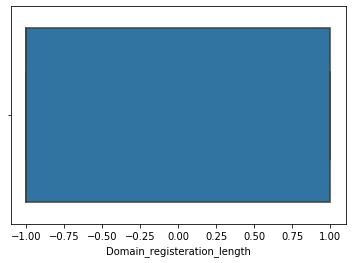

In [11]:
sns.boxplot(data['Domain_registeration_length'])

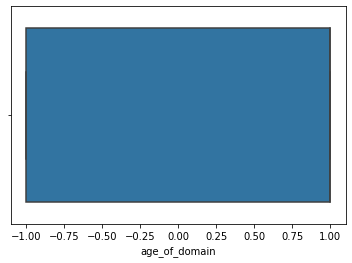

In [12]:
  sns.boxplot(data['age_of_domain'])

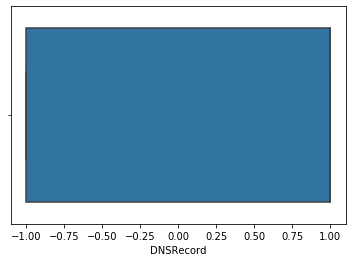

In [13]:
sns.boxplot(data['DNSRecord'])

# 5) Removing outliners using zscore

In [14]:
from scipy import stats
z=np.abs(stats.zscore(data)) 

In [15]:
threshold=3
np.where(z>threshold)

(array([   19,    19,    31, ..., 11041, 11050, 11050], dtype=int64),
 array([20, 22, 22, ..., 22, 20, 22], dtype=int64))

In [16]:
data_with_no_outliners=data[(z<=3).all(axis=1)]

In [17]:
clean_data=pd.DataFrame(data_with_no_outliners)

In [18]:
clean_data

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [19]:
clean_data.shape

(10035, 31)

# 6. Splitting the data

In [20]:
# Sepratating & assigning features and target columns to X & y

x=clean_data.iloc[:,0:30].values
y=clean_data.iloc[:,-1].values


In [21]:
x

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]], dtype=int64)

In [22]:
y

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [23]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape

(8028, 30)

# 7. Machine Learning Models & Training
From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

-> Decision Tree
-> Random Forest
-> Support Vector Machines
-> KNN
-> Naive Bayes
-> Logistic Regression

In [25]:
# Creating holders to store the model performance results

ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results

def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# DECISION TREE
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
dt_grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10)},cv=5)

In [30]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
  

In [31]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [32]:
dt=DecisionTreeClassifier(max_depth=9,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_test_tree = dt.predict(x_test)
y_train_tree = dt.predict(x_train)

Perfomance Evalution:

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
#computing the accuracy of the model performance
acc_test_Dtree = accuracy_score(y_test,y_test_tree)
acc_train_Dtree = accuracy_score(y_train,y_train_tree)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_Dtree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_Dtree))

 

Decision Tree: Accuracy on training Data: 0.954
Decision Tree: Accuracy on test Data: 0.938


Storing the results:

In [36]:
storeResults('Decision Tree', acc_train_Dtree, acc_test_Dtree)

# RANDOM FOREST
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.



In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:

rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':np.arange(1,50),'criterion':['gini','entropy'],'max_depth':np.arange(2,10)},cv=5)

In [40]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy

In [41]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 48}

In [79]:
rf=RandomForestClassifier(max_depth = 9,n_estimators= 48,criterion='gini')

In [80]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=48,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
y_test_rftree = rf.predict(x_test)
y_train_rftree = rf.predict(x_train)

Perfomance Evalution:

In [82]:
#computing the accuracy of the model performance
acc_test_rftree = accuracy_score(y_test,y_test_rftree)
acc_train_rftree = accuracy_score(y_train,y_train_rftree)
print("random forest: Accuracy on training Data: {:.3f}".format(acc_train_rftree))
print("random forest: Accuracy on test Data: {:.3f}".format(acc_test_rftree))

 

random forest: Accuracy on training Data: 0.954
random forest: Accuracy on test Data: 0.955


Storing Results:

In [46]:
storeResults('Random Forest', acc_train_rftree, acc_test_rftree)

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knn_grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(1,20)},cv=5)

In [50]:
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
knn_grid.best_params_

{'n_neighbors': 1}

In [52]:
knn=KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
y_test_knn = knn.predict(x_test)
y_train_knn = knn.predict(x_train)
 

Performance evalution:

In [55]:
#computing the accuracy of the model performance
acc_test_knn=accuracy_score(y_test,y_test_knn)
acc_train_knn = accuracy_score(y_train,y_train_knn)
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print("KNN: Accuracy on train Data: {:.3f}".format(acc_train_knn))

 

KNN: Accuracy on test Data: 0.963
KNN: Accuracy on test Data: 0.987


Storing Results:

In [56]:
storeResults('KNN', acc_train_knn, acc_test_knn)

# NAIVE BAYES

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [58]:
pipe=Pipeline([('mn',MinMaxScaler()),('naive',GaussianNB())])

In [59]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('mn', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('naive', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [60]:
y_test_NB = pipe.predict(x_test)
y_train_NB = pipe.predict(x_train)

Performance Evaluation:

In [61]:
#computing the accuracy of the model performance
acc_test_NB=accuracy_score(y_test,y_test_NB)
acc_train_NB=accuracy_score(y_train,y_train_NB)
print("Naive Bayes: Accuracy on training Data: {:.3f}".format(acc_train_NB))
print("Naive Bayes: Accuracy on test Data: {:.3f}".format(acc_test_NB))

 

Naive Bayes: Accuracy on training Data: 0.623
Naive Bayes: Accuracy on test Data: 0.612


Storing Result:

In [62]:
storeResults('Naive Bayes', acc_train_NB, acc_test_NB)

# SUPPORT VECTOR MACHINE
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.



In [63]:
from sklearn.svm import SVC

In [78]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [64]:
svm = SVC(kernel='linear', C=1.0, random_state=12)


In [65]:
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=12,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

Performance Evaluation:

In [67]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.924
SVM : Accuracy on test Data: 0.921


Storing Result:

In [68]:
storeResults('SVM', acc_train_svm, acc_test_svm)

# LOGISTIC REGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(x_train,y_train)

C:\Users\garne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_test_lr=lr.predict(x_test)
y_train_lr=lr.predict(x_train)

Performance Evaluation

In [73]:
acc_train_lr = accuracy_score(y_train,y_train_lr)
acc_test_lr = accuracy_score(y_test,y_test_lr)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_lr))

SVM: Accuracy on training Data: 0.921
SVM : Accuracy on test Data: 0.927


Storing Result

In [74]:
storeResults('Logistic Regression', acc_train_svm, acc_test_svm)

# 8 Comparing of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [75]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.954,0.938
1,Random Forest,0.949,0.952
2,KNN,0.987,0.963
3,Naive Bayes,0.623,0.612
4,SVM,0.924,0.921
5,Logistic Regression,0.924,0.921


In [76]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)


,ML Model,Train Accuracy,Test Accuracy
2,KNN,0.987,0.963
1,Random Forest,0.949,0.952
0,Decision Tree,0.954,0.938
4,SVM,0.924,0.921
5,Logistic Regression,0.924,0.921
3,Naive Bayes,0.623,0.612


For the above comparision, it is clear that the knn Classifier works well with this dataset.

So, saving the model for future use.

# Visualizing Models Accuracy

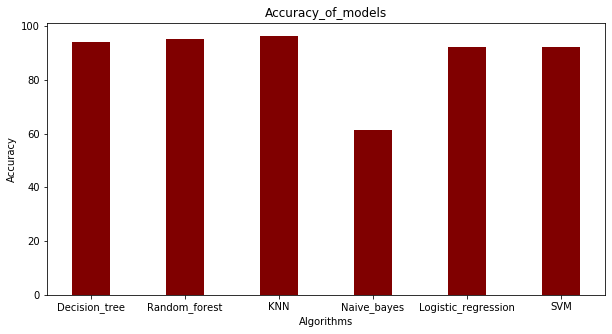

In [77]:

bar_data = {'Decision_tree':93.9, 'Random_forest':95.3, 'KNN':96.3,
        'Naive_bayes':61.2,'Logistic_regression':92.1,'SVM':92.1}
Algorithms = list(bar_data.keys())
Accuracy_score = list(bar_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(Algorithms, Accuracy_score, color ='maroon',
        width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy_of_models")
plt.show()

In [83]:
# save knn model to file
import pickle
pickle.dump(knn, open("KNeighborsClassifier.pickle.dat", "wb"))

In [84]:
# load model from file
loaded_model = pickle.load(open("KNeighborsClassifier.pickle.dat", "rb"))
loaded_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')